In [5]:
import pandas as pd
import json

In [6]:
sales_data = pd.read_csv('fct_invoice.csv')
with open('dim_customer.json', 'r') as dataset:
    customer = json.load(dataset)

In [7]:
unique_customers = sales_data['customer_id'].unique()

num_unique = len(unique_customers)

print("Easy 1: " + str(num_unique)+' unique customers')

Easy 1: 5191 unique customers


In [8]:
unique_categories = sales_data['category'].unique()
categories = ", ".join(unique_categories)
num_unique = len(unique_categories)

print("Easy 2: " + categories + ", " + str(num_unique) + ' unique categories')

Easy 2: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir, 8 unique categories


In [9]:
most_pop_payment = sales_data['payment_method'].value_counts().idxmax()
frequency = sales_data['payment_method'].value_counts().max()

print("Easy 3: " + most_pop_payment + ", frequency: " + str(frequency))

Easy 3: Cash, frequency: 44447


In [12]:
sales_data['total sales'] = sales_data['quantity'] * sales_data['price']
sales_per_categ = sales_data.groupby('category')['total sales'].sum()
top_three = sales_per_categ.sort_values(ascending=False).head(3)

print("Medium 1: ")
for category, total in top_three.items():
    print(category + ": " + str(total))

Medium 1: 
Clothing: 113996791.03999999
Shoes: 66553451.47
Technology: 57862350.0


In [13]:
customer_data = pd.DataFrame(customer)

joined_data = sales_data.merge(customer_data, left_on='customer_id', right_on='id')
joined_data['total_sales'] = joined_data['price'] * joined_data['quantity']
over_45 = joined_data[joined_data['age']>45]['total sales'].sum()
print("Medium 2: " + str(over_45))

Medium 2: 82039768.15


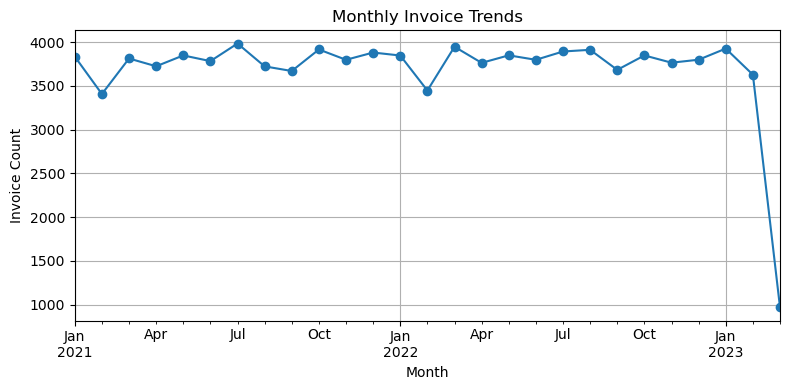

In [24]:
import matplotlib.pyplot as plt

sales_data['invoice_date'] = pd.to_datetime(sales_data['invoice_date'], dayfirst=True)
monthly_sales_count = sales_data['invoice_date'].dt.to_period('M').value_counts().sort_index()

monthly_sales_count.plot(title='Monthly Invoice Trends', kind='line', marker='o',figsize=(8,4))
plt.xlabel('Month')
plt.ylabel('Invoice Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
joined_data = joined_data.dropna(subset=['age'])

lower_bound = ((joined_data['age']//10)*10).astype(int)
upper_bound = (lower_bound + 9).astype(int)
joined_data['age_range'] = lower_bound.astype(str) + "-" + (upper_bound).astype(str)
joined_data['age'] = (joined_data['age']).astype(int)
age_count = sorted(joined_data['age_range'].unique(),key=lambda x:int(float(x.split('-')[0])))

pivot_table = pd.pivot_table(joined_data, index='category',columns = 'age_range',values='total_sales',aggfunc = 'sum',fill_value=0)

pivot_table = pivot_table[age_count]
pivot_table['Tota']=pivot_table.sum(axis=1)
pivot_table.loc['total'] = pivot_table.sum()
pivot_table.style.format("{:,.2f}")


age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Tota
category,,,,,,,,,
Books,"12,801.75","79,461.75","84,143.10","87,203.40","74,962.20","80,476.80","54,827.85","26,664.00","500,540.85"
Clothing,"1,927,413.84","10,250,732.80","11,354,126.96","11,215,189.92","10,321,851.76","10,660,642.08","7,769,371.28","4,493,698.00","67,993,026.64"
Cosmetics,"109,619.36","605,915.32","723,544.70","665,034.96","587,780.96","649,990.76","419,082.62","254,531.60","4,015,500.28"
Food & Beverage,"13,582.31","73,491.96","87,246.86","89,553.29","72,425.04","80,976.09","55,050.98","31,332.93","503,659.46"
Shoes,"993,281.35","5,924,878.24","7,200,839.66","7,025,590.02","5,852,857.84","5,978,893.54","4,480,269.05","2,628,744.60","40,085,354.30"
Souvenir,"12,375.15","54,943.32","64,092.72","66,391.80","54,943.32","55,025.43","38,673.81","23,718.06","370,163.61"
Technology,"1,129,800.00","5,261,550.00","6,159,300.00","5,954,550.00","4,435,200.00","5,471,550.00","3,638,250.00","1,946,700.00","33,996,900.00"
Toys,"60,426.24","385,100.80","420,582.40","390,906.88","345,067.52","363,955.20","273,244.16","153,932.80","2,393,216.00"
total,"4,259,300.00","22,636,074.19","26,093,876.40","25,494,420.27","21,745,088.64","23,341,509.90","16,728,769.75","9,559,321.99","149,858,361.14"
